<a href="https://colab.research.google.com/github/Souvik2230/Iris-Flower-Classification/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.metrics import confusion_matrix

In [67]:
iris = pd.read_csv("/content/Iris.csv") #load the dataset

In [68]:
iris.head() #show the first 5 rows from the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
iris.shape #shape of the dataset

(150, 6)

In [70]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [71]:
iris.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


#### Removing the unneeded column

In [72]:
iris.drop('Id',axis=1,inplace=True) #dropping the Id column as it is unecessary

## Some Exploratory Data Analysis With Iris

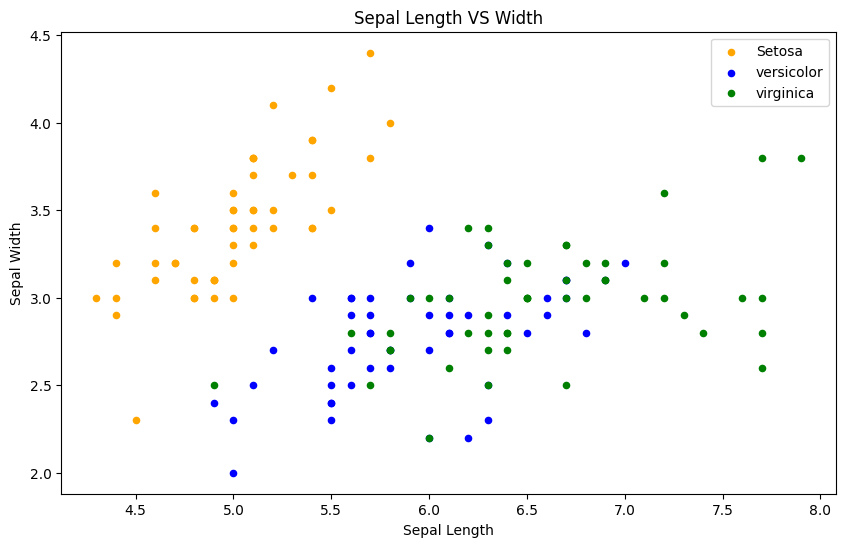

In [73]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.

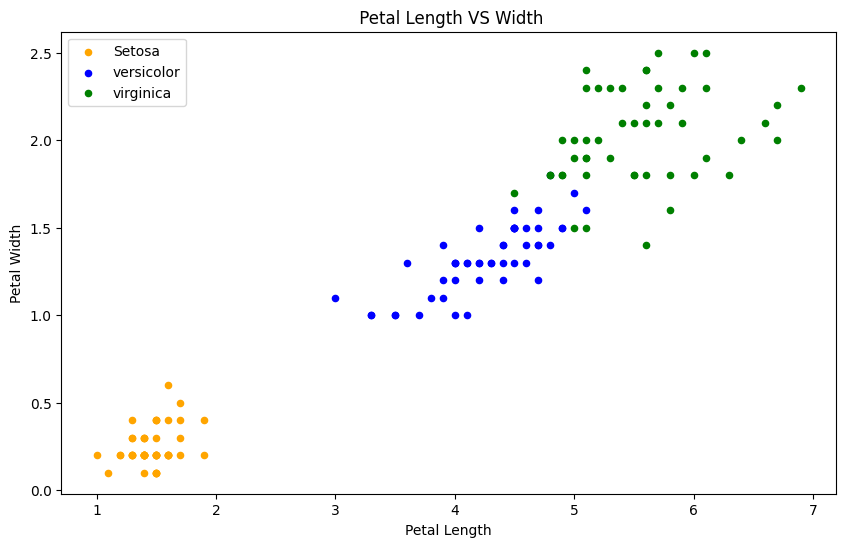

In [74]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

### Now let us see how are the length and width are distributed

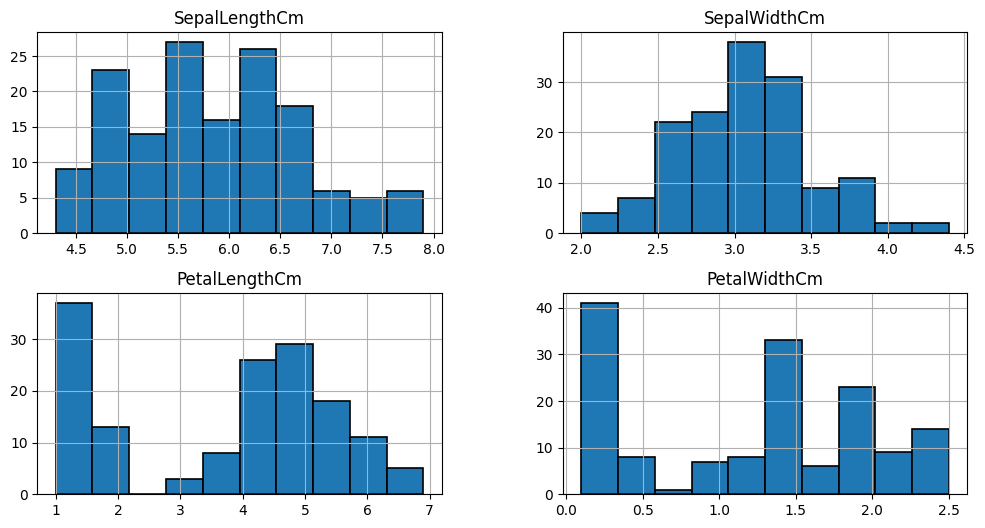

In [75]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

### Now let us see how the length and width vary according to the species

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

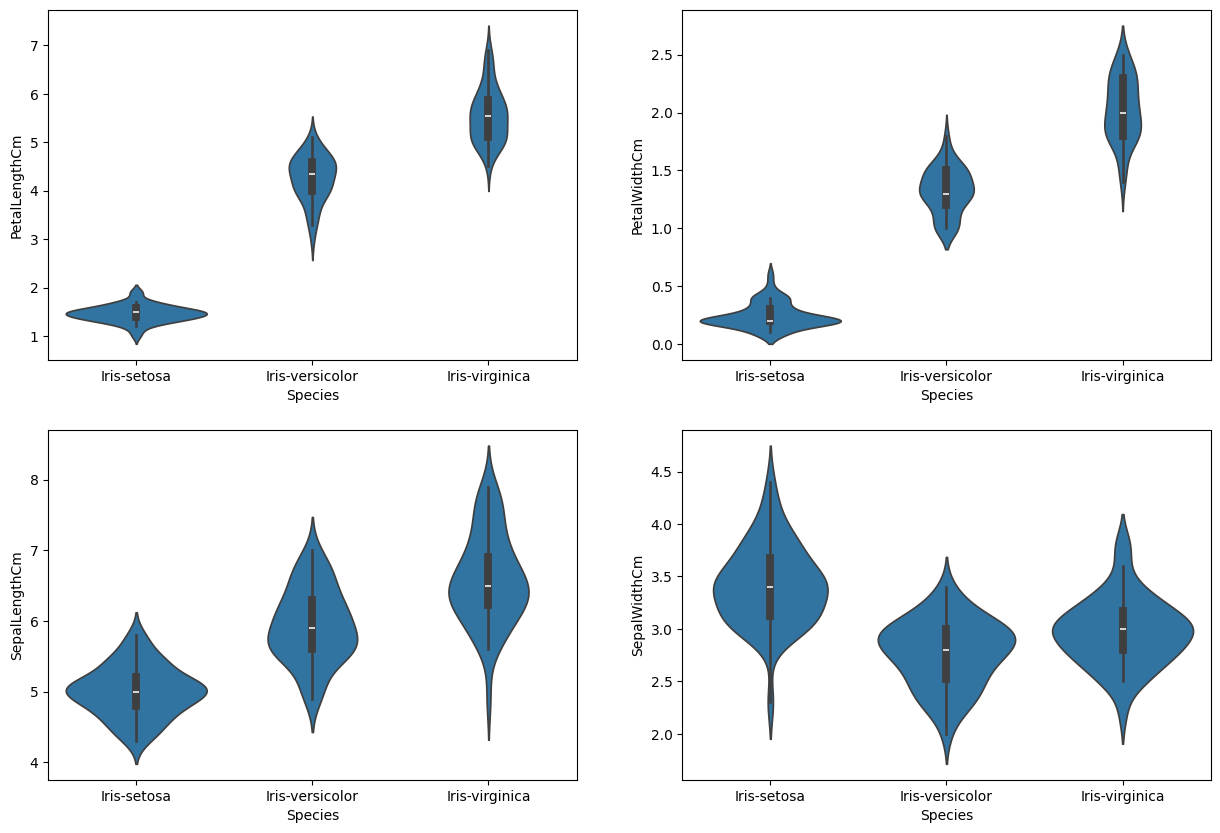

In [76]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

In [77]:
# "Iris-setosa":0,"Iris-versicolor Species":1,"Iris-virginica":2
iris['Species'].replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2},inplace=True)
iris.head()

/tmp/ipython-input-260211652.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  iris['Species'].replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2},inplace=True)
/tmp/ipython-input-260211652.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris['Species'].replace({"Iris-setosa":0,"I

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

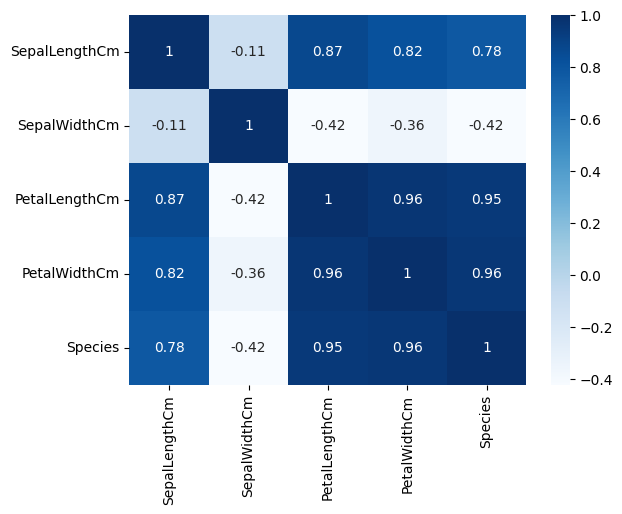

In [78]:
corr=iris.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='Blues')

### Splitting The Data into Training And Testing Dataset

In [79]:
iris.columns=iris.columns.str.lower()

In [80]:
x=iris.drop('species',axis=1)
y=iris['species']

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

Lets check the Train and Test Dataset

In [82]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

### Support Vector Machine (SVM)

In [83]:
for i in range(1,6):
    model = svm.SVC(C=i) #select the algorithm
    model.fit(x_train,y_train) # we train the algorithm with the training data and the training output
    prediction=model.predict(x_test) #now we pass the testing data to the trained algorithm
    print(f'C={i} --> score',metrics.accuracy_score(prediction,y_test))#now we check the accuracy of the algorithm.

C=1 --> score 0.9666666666666667
C=2 --> score 1.0
C=3 --> score 1.0
C=4 --> score 1.0
C=5 --> score 1.0


In [84]:
# Choosing Model width Right Paramettre
model_svc=svm.SVC(C=2)
model_svc.fit(x_train,y_train)
model_svc.score(x_test,y_test)

1.0

### Logistic Regression

In [85]:
model_lg = LogisticRegression()
model_lg.fit(x_train,y_train)
prediction=model_lg.predict(x_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9666666666666667


### Decision Tree

In [86]:
scores=[]
for d in range(1,15):
    model=DecisionTreeClassifier(max_depth=d)
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    acc=metrics.accuracy_score(prediction,y_test)
    scores.append((d,acc))

In [87]:
scores=pd.DataFrame(scores,columns=['Max_Depth',"Accuracy"])
scores.head(3)

,Max_Depth,Accuracy
0,1,0.666667
1,2,0.933333
2,3,0.966667


<Axes: xlabel='Max_Depth', ylabel='Accuracy'>

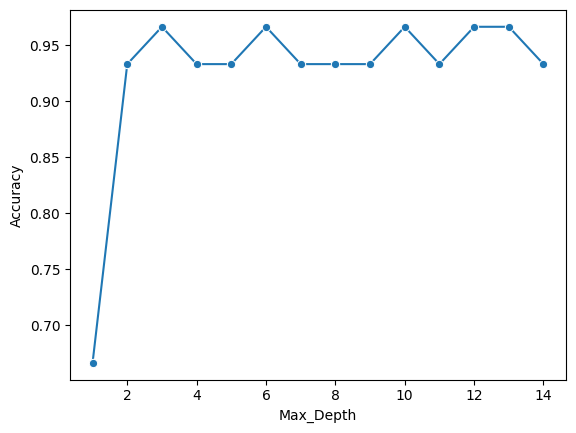

In [88]:
sns.lineplot(data=scores,x="Max_Depth",y="Accuracy",marker="o")

In [89]:
scores=[]
for d in [3,5,8,9,11,12]:
    for s in [1,2,5,10,15,20,25,50,100,150,200]:
        model=DecisionTreeClassifier(max_depth=d,min_samples_leaf=s)
        model.fit(x_train,y_train)
        prediction=model.predict(x_test)
        acc=metrics.accuracy_score(prediction,y_test)
        scores.append((d,s,acc))

In [90]:
scores=pd.DataFrame(scores,columns=["Max_Depth","Min_Samples_Leaf","Accuracy"])
scores_pivot=scores.pivot(index="Max_Depth",columns="Min_Samples_Leaf",values="Accuracy")

<Axes: xlabel='Min_Samples_Leaf', ylabel='Max_Depth'>

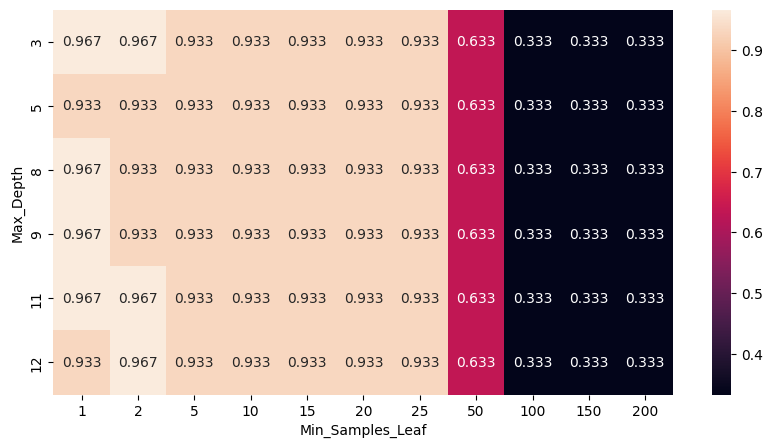

In [91]:
plt.figure(figsize=(10,5))
sns.heatmap(scores_pivot,annot=True,fmt=".3f")

In [92]:
## Best Paramettre for DecisionTreeClassifier
model_dtc=DecisionTreeClassifier(max_depth=3,min_samples_leaf=1)
model_dtc.fit(x_train,y_train)
model_dtc.score(x_test,y_test)

0.9666666666666667

### K-Nearest Neighbours

In [93]:
scores=[]
for n in range(1,10):
    model=KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    acc=metrics.accuracy_score(prediction,y_test)
    scores.append((n,acc))

scores=pd.DataFrame(scores,columns=["n_neighbors","Accuracy"])

<Axes: xlabel='n_neighbors', ylabel='Accuracy'>

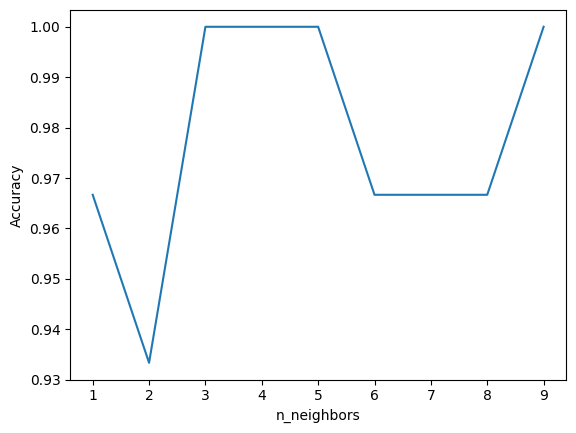

In [94]:
sns.lineplot(data=scores,x="n_neighbors",y="Accuracy")

In [95]:
# Best Paremettre for K-Nearest neighbours
model_knn=KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train,y_train)
model_knn.score(x_test,y_test)

1.0

The Best Models Are :
- Support Vector Machine
- K-Nearest neighbours

In [96]:
model=svm.SVC(C=2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [97]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

<Axes: >

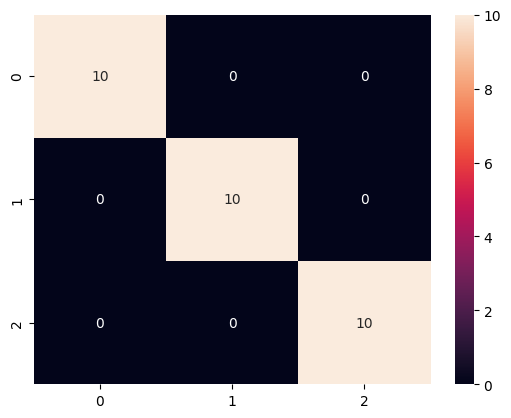

In [98]:
sns.heatmap(cm,annot=True)